### In this file, we execute the Bayesian Optimization (BO) algorithm applied for hyperparameter tuning of the Simulated Quantum Annealing (SQA) algorithm

0. Connect to QAPTIVA

In [1]:
from qat.qlmaas import QLMaaSConnection
conn = QLMaaSConnection(hostname="qlm35e.neasqc.eu", check_host=False)

1. Import parameters file and the classes to solve SQA and perform hyperparameter tuning with the PINN

In [2]:
import parameters
from SQA_hyper_tuning_BO import BayesianOptimizer, SQA_solver, Brute_Force_Solver
import numpy as np
import matplotlib.pyplot as plt

2. Import parameters from parameters file

In [3]:
n_spins, n_shots, delta_t = parameters.n_spins, parameters.n_shots, parameters.delta_t
n_init, n_iters = parameters.n_init, parameters.n_iters
min_vals, max_vals = parameters.min_vals, parameters.max_vals
bounds = [(min_vals[i], max_vals[i]) for i in range(len(min_vals))]

3. Create an instance of the SQA_solver class and generate the couplings and transverse fields randomly or with a given graph

In [4]:
sqa = SQA_solver(n_spins=n_spins, n_shots=n_shots, delta_t=delta_t)

mode = 'random' # 'graph' or 'random'
if mode == 'random':
    seed = 42
    J, h = sqa.generate_random_problems(n_examples=1, seed=seed)
elif mode =='graph':
    file_name = "40nodes_p0.3_J-1.0to1.0_h0_Erdös-Rényi.pkl"
    G = sqa.load_graph_from_file(filepath=f"./{file_name}")
    J, h = sqa.ising_params_from_graph(G) 

4. Use Bayesian Optimization for hyperparameter tuning of SQA

In [5]:
bo = BayesianOptimizer(sqa=sqa, bounds=bounds, n_init=n_init)
X_opt, Y_opt, history = bo.optimize(n_iters=n_iters)

Submitted a new batch: SJob61973
Submitted a new batch: SJob61974


KeyboardInterrupt: 

5. Solve the problem by brute force for benchmarking

In [ ]:
solve_with_bf = False
if solve_with_bf:
    bf_solver = Brute_Force_Solver(J, h)
    exact_gs_energy, config = bf_solver.brute_force_solve()

6. Print the results

In [ ]:
# Show best result
best_idx = np.argmin(Y_opt)
print("\nBest hyperparameters found:")
print(f"beta: {X_opt[best_idx][0]:.4f}")
print(f"annealing_time: {X_opt[best_idx][1]:.4f}")
print(f"gamma_0: {X_opt[best_idx][2]:.4f}")
print(f"n_trotters: {int(X_opt[best_idx][3])}")
print(f"SQA ground state energy: {Y_opt[best_idx][0]:.4f}")
if solve_with_bf:
    print(f"Actual ground state energy: {exact_gs_energy:.4f}")


Best hyperparameters found:
beta: 26.4642
annealing_time: 662.3070
gamma_0: 814.9582
n_trotters: 50
SQA ground state energy: -32.5714


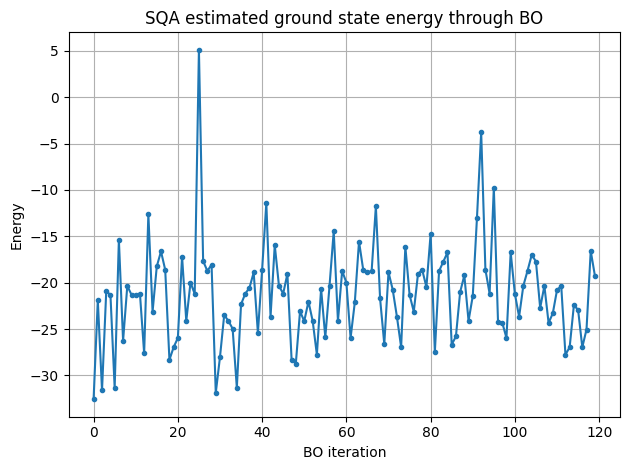

In [ ]:
energies = np.array([t[1] for t in history])
betas = np.array([t[0][0] for t in history])
annealing_times = np.array([t[0][1] for t in history])
gamma_0s = np.array([t[0][2] for t in history])
n_trotterss = np.array([t[0][3] for t in history])

plt.figure()
plt.plot(range(n_iters), energies,'.-')
plt.xlabel('BO iteration')
plt.ylabel('Energy')
plt.title('SQA estimated ground state energy through BO')
plt.grid(True)
plt.tight_layout()
plt.show()

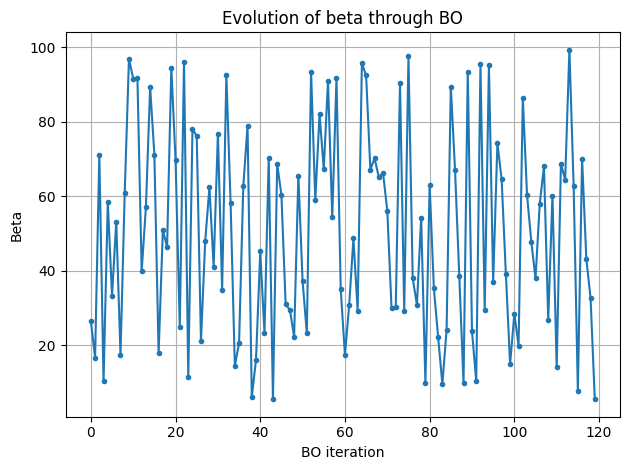

Correlation of energy and beta =  -0.05563581804626643


In [ ]:
# Betas

plt.figure()
plt.plot(range(n_iters), betas,'.-')
plt.xlabel('BO iteration')
plt.ylabel('Beta')
plt.title('Evolution of beta through BO')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_energy_beta = np.corrcoef(betas, energies)[0, 1]
print("Correlation of energy and beta = ", corr_energy_beta)

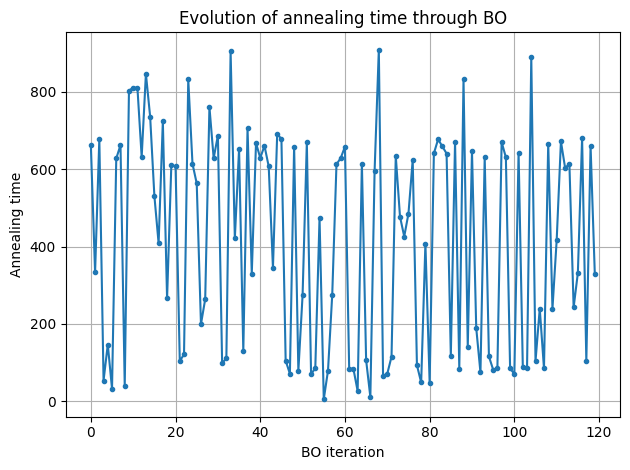

Correlation of energy and annealing_time =  -0.0668434161282138


In [ ]:
# Annealing times

plt.figure()
plt.plot(range(n_iters), annealing_times,'.-')
plt.xlabel('BO iteration')
plt.ylabel('Annealing time')
plt.title('Evolution of annealing time through BO')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_energy_annealing_time = np.corrcoef(annealing_times, energies)[0, 1]
print("Correlation of energy and annealing_time = ", corr_energy_annealing_time)

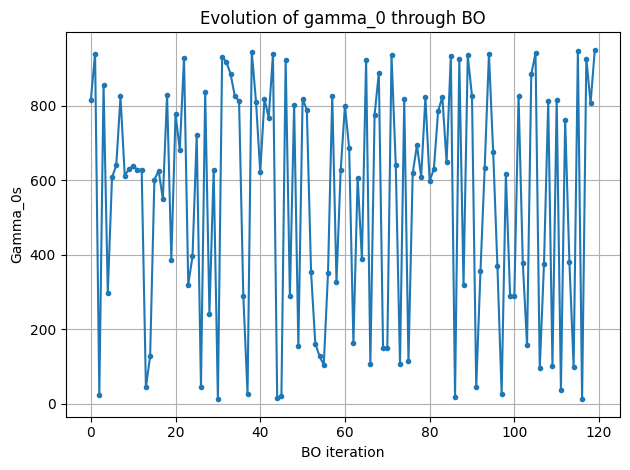

Correlation of energy and gamma_0 =  0.05934462354728011


In [ ]:
# Gamma_0s

plt.figure()
plt.plot(range(n_iters), gamma_0s,'.-')
plt.xlabel('BO iteration')
plt.ylabel('Gamma_0s')
plt.title('Evolution of gamma_0 through BO')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_energy_gamma_0 = np.corrcoef(gamma_0s, energies)[0, 1]
print("Correlation of energy and gamma_0 = ", corr_energy_gamma_0)

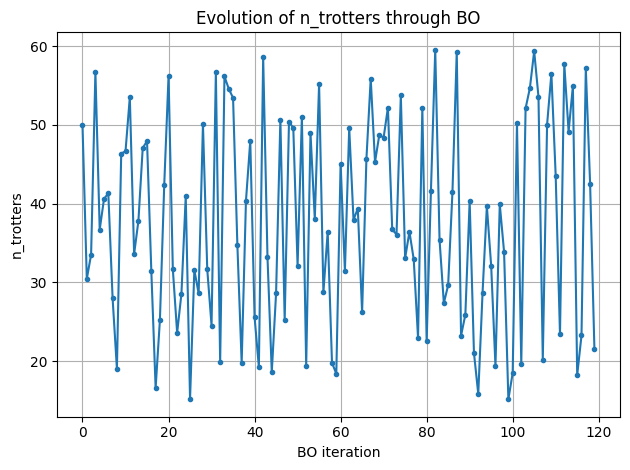

Correlation of energy and n_trotters =  -0.2362891608674406


In [ ]:
# n_trotters

plt.figure()
plt.plot(range(n_iters), n_trotterss,'.-')
plt.xlabel('BO iteration')
plt.ylabel('n_trotters')
plt.title('Evolution of n_trotters through BO')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_energy_n_trotters = np.corrcoef(n_trotterss, energies)[0, 1]
print("Correlation of energy and n_trotters = ", corr_energy_n_trotters)